# Modeling

## Imports

In [7]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor
from time import time
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
!pip install catboost 
from catboost import CatBoostRegressor


     ---------------------------------------- 89.1/89.1 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 74.0/74.0 MB 5.5 MB/s eta 0:00:00


## Load the data

In [3]:
#We load the cleanedData csv which is the file that comes from doing the pre-processing(which takes some minutes to run so we just save it in the git.
df = pd.read_csv("CleanedData.csv")
df2 = df.drop(columns=['host_id', 'id', 'name', 'host_name', 'last_review']) #we drop the columns we are not using
df2=df2.dropna().reset_index(drop=True) # we drop na rows (only 1 row)
features = [col for col in df2.columns if col != "price"] #we define the features as all columns except price
target = df2["price"]  #and the target price.
print("features", features)

features ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Astoria', 'Bedford-Stuyvesant', 'Bushwick', 'Chelsea', 'Clinton Hill', 'Crown Heights', 'East Flatbush', 'East Harlem', 'East Village', 'Financial District', 'Flatbush', 'Fort Greene', 'Greenpoint', 'Harlem', "Hell's Kitchen", 'Long Island City', 'Lower East Side', 'Midtown', 'Outside', 'Park Slope', 'Prospect-Lefferts Gardens', 'Upper East Side', 'Upper West Side', 'Washington Heights', 'West Village', 'Williamsburg', 'Entire home/apt', 'Private room', 'Shared room', 'is_rated', 'length_name', 'sentiment', 'high_price_count', 'low_price_count', 'price_keyword_ratio', 'host_total_listings_count', 'host_activity', 'distance_to_center', 'time_since_last_review', 'last_review_year', 'last_review_month', 'last_review_dayofweek', 'min_nights2']


## Decision Tree

(best_model: DecisionTreeRegressor(ccp_alpha=0, max_depth=8, min_samples_leaf=4,
                      random_state=42)
Best Parameters: {'ccp_alpha': 0, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSE: 0.4193418074015745
R-squared: 0.596131506000871
Mean squared error: 0.17584755143481923


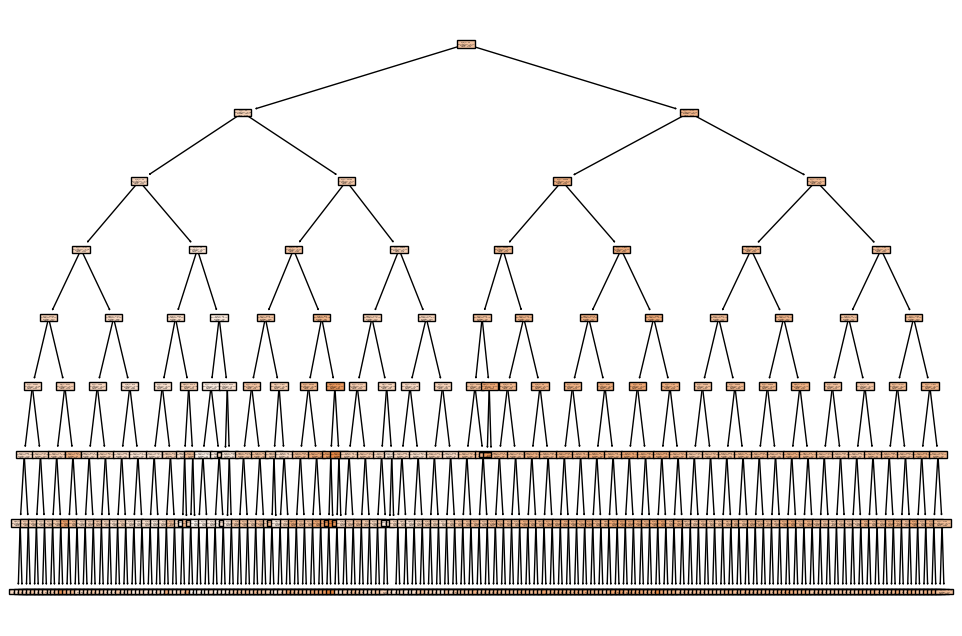

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2[features], target, test_size=0.2, random_state=10)

# Initialize model
model = DecisionTreeRegressor(random_state=42)

# Define hyperparameters for grid search
#This grid should improve performance slighly
# params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#           'min_samples_split': [2, 5, 10],
#           'min_samples_leaf': [1, 2, 4, 8],
#           'max_leaf_nodes': [None, 2, 5, 10, 20],
#           'ccp_alpha': [0, 0.01, 0.1, 1, 10]} #for regularization purposes

          # Define the parameter grid
params = {'max_depth': [2, 5, 8],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 4],
          'ccp_alpha': [0, 0.1, 1]}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print('(best_model:',best_model)
best_params = grid_search.best_params_
# Fit best model to data
best_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = best_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("RMSE:", rmse)
print("R-squared:", r2)
print("Mean squared error:", mse)

# Plot decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True)
plt.show()

# Best Parameters: {'ccp_alpha': 0, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}
# RMSE: 0.4193418074015745
# R-squared: 0.596131506000871
# Mean squared error: 0.17584755143481923

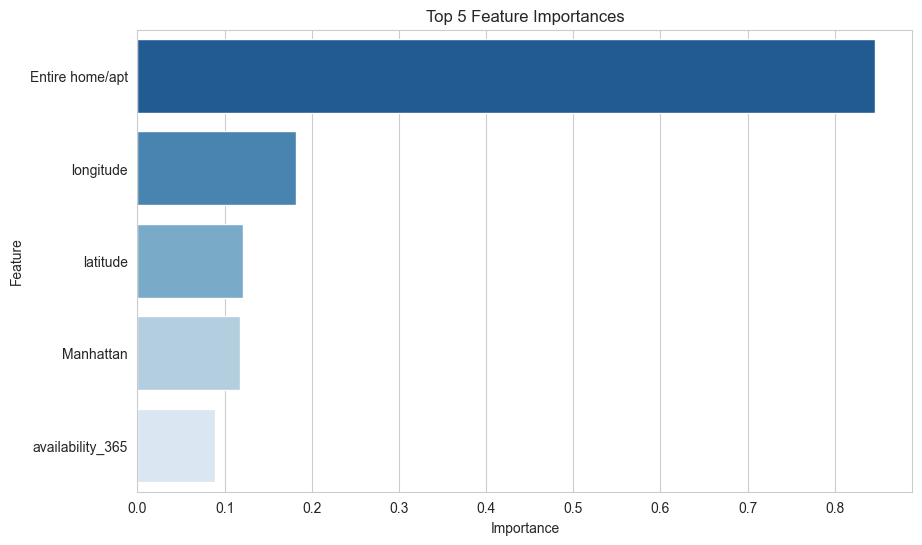

Training R^2: 0.6294788276625701
Testing R^2: 0.596131506000871
Training Explained Variance Score: 0.6294788276625701
Testing Explained Variance Score: 0.5961949120432395
Training Mean Absolute Error: 0.30170684410977733
Testing Mean Absolute Error: 0.31511513846301425
Training Mean Squared Error: 0.16057548132114552
Testing Mean Squared Error: 0.17584755143481923


In [13]:
# Visualize feature importance
# Get feature importances
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=0)
importances = result.importances_mean
features = X_train.columns

# Create dataframe of feature importances
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(5), palette='Blues_r')
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print other evaluation metrics

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_explained_variance = explained_variance_score(y_train, y_pred_train)
test_explained_variance = explained_variance_score(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)
print("Training Explained Variance Score:", train_explained_variance)
print("Testing Explained Variance Score:", test_explained_variance)
print("Training Mean Absolute Error:", train_mae)
print("Testing Mean Absolute Error:", test_mae)
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)


## BAGGING

In [15]:
# Define the base estimator (i.e. decision tree)
base_estimator = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for the bagging
##This grid takes a bit of time... at least 20 mins.
# params = {
#     'n_estimators': [10, 50, 100, 200,300],
#     'max_samples': [0.5, 1.0],
#     'max_features': [0.5, 1.0],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False]
# }

##Used this smaller gridsearch for the last run in the end it took a while too but 
params = {
    'n_estimators': [300],
    'max_samples': [0.5, 1.0],
    'max_features': [1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
# Define the bagging regressor
bagging = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=42)

# Define the grid search
grid_search = GridSearchCV(estimator=bagging, param_grid=params, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print('Best model:', best_estimator)

print('Best hyperparameters:', best_params)

# Train the best estimator on the training data
best_estimator.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R-squared:", r2)
print("Mean squared error:", mse)

#Best model: BaggingRegressor(bootstrap_features=True,
#                 estimator=DecisionTreeRegressor(random_state=42),
#                 n_estimators=300, random_state=42)
#Best hyperparameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 300}
#RMSE: 0.39092718408567373
#R-squared: 0.6490094757027518
#Mean squared error: 0.15282406325715425

Best model: BaggingRegressor(bootstrap_features=True,
                 estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=300, random_state=42)
Best hyperparameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 300}
RMSE: 0.39092718408567373
R-squared: 0.6490094757027518
Mean squared error: 0.15282406325715425


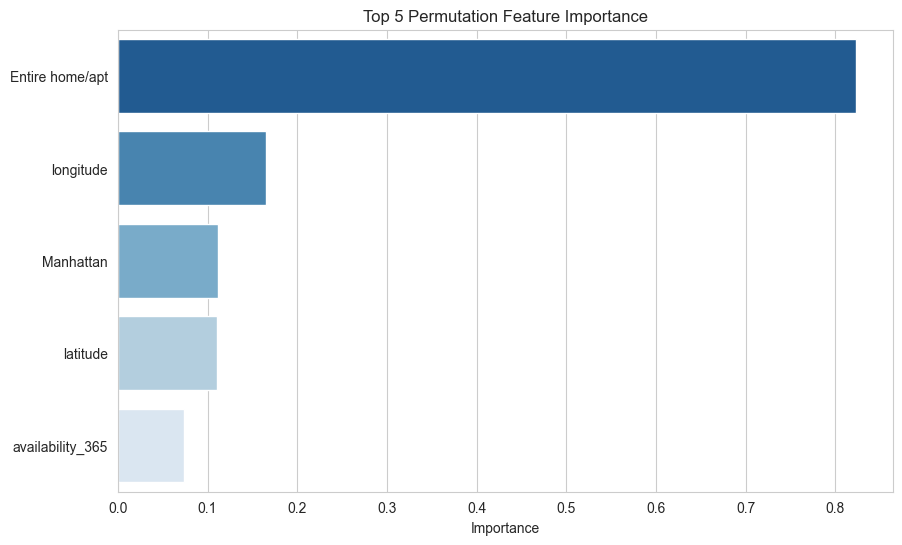

In [17]:
# Get feature importances using permutation importance
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0)

# Extract feature importances and sort in descending order
importances = result.importances_mean
sorted_idx = importances.argsort()[::-1]
feature_names = X_test.columns

# Print feature importances
#print("Feature importance:")
#for i in sorted_idx:
#    print(f"{feature_names[i]}: {importances[i]}")

# Plot feature importances
# Plot feature importances for top 5 features
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx][:5], y=feature_names[sorted_idx][:5], palette='Blues_r')
plt.title('Top 5 Permutation Feature Importance')
plt.xlabel('Importance')
plt.show()


In [ ]:
##Won't run this again but shows that from N_estimators 300 the mse stabilizes.
N = 30
mse = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(df2[features], target, test_size=0.2, random_state=10)
    reg = BaggingRegressor(estimator=DecisionTreeRegressor(), 
                            max_samples=1.0,
                            max_features=1.0, 
                            n_estimators=(i+1)*10,
                            bootstrap=True, 
                            bootstrap_features=True, 
                            random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse[i] = mean_squared_error(y_test, y_pred)
    print(f'estimators:{i}*10:',mse[i])


plt.plot([10*(i+1) for i in range(30)], mse)
plt.xlabel("Number of estimators")
plt.ylabel("MSE")
plt.title("MSE vs. Number of Estimators")
plt.show()

# CatBoost

In [5]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df2[features], target, test_size=0.2, random_state=10)

In [ ]:
cat_params = {'depth': [7, 8, 9, 10, 11],
             'iterations': np.arange(270,320,10),
             'learning_rate': [0.14, 0.15, 0.16]}

cat_model = CatBoostRegressor(random_state = 27)

grid_search = GridSearchCV(cat_model, param_grid=cat_params, cv=3, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [8]:
# Best hyperparameters we got
best_model = CatBoostRegressor(learning_rate = 0.15, iterations = 280, depth = 8, verbose = False, random_state=27)

best_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = best_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [9]:
print("RMSE:", rmse)
print("R-squared:", r2)
print("Mean squared error:", mse)

RMSE: 0.3896900339314351
R-squared: 0.6512274892243155
Mean squared error: 0.151858322545483


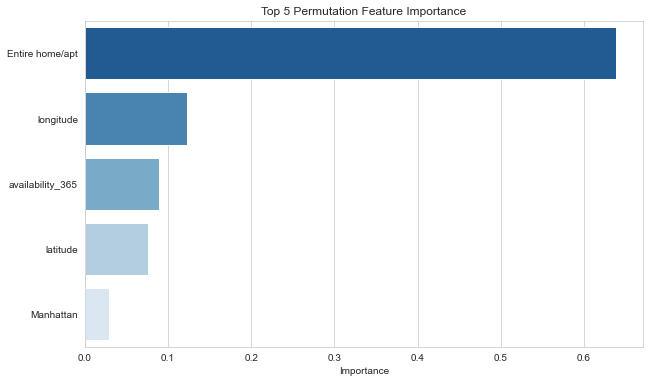

In [10]:
# Get feature importances using permutation importance
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0)

# Extract feature importances and sort in descending order
importances = result.importances_mean
sorted_idx = importances.argsort()[::-1]
feature_names = X_test.columns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx][:5], y=feature_names[sorted_idx][:5], palette='Blues_r')
plt.title('Top 5 Permutation Feature Importance')
plt.xlabel('Importance')
plt.show()
